In [82]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [83]:
# Trim the data set
# df = pd.read_csv('city_temperature.csv')
# df = df.drop(['Region','Country','State'], axis=1)
# df.to_csv('update_city_temperature.csv', index=False)

dtypes = [('city', 'U50'),('month', float),('day', float),('year', float), ('temperature', float)]
City,Month,Day,Year,AvgTemperature = np.loadtxt('update_city_temperature.csv',delimiter=',', skiprows=1, dtype=dtypes, unpack=True)

# Specify the Timeline of Study

In [84]:

start_date = datetime(2005, 3, 1)
end_date = datetime(2005, 3, 31)

print(start_date)
print(end_date)


2005-03-01 00:00:00
2005-03-31 00:00:00


# Logic Used to Filter 

In [85]:
day_logic = np.logical_and (np.array(Day)>= start_date.day, np.array(Day)  <= end_date.day)
month_logic = np.logical_and (np.array(Month)>= start_date.month, np.array(Month)  <= end_date.month)
year_logic = np.logical_and (np.array(Year)>= start_date.year, np.array(Year)  <= end_date.year)


same_month_logic = np.array(Month)== start_date.month

city_logic = np.array(City == 'Nairobi')

print(day_logic)

print(month_logic)

print(year_logic)


[ True  True  True ...  True  True  True]
[False False False ... False False False]
[False False False ... False False False]


# Filter the Dataset 

In [86]:
new_days = Day[(np.abs(AvgTemperature) < 90) &  day_logic & month_logic & year_logic & same_month_logic & city_logic]

new_temperature = AvgTemperature[(np.abs(AvgTemperature) < 90)  & day_logic & month_logic & year_logic & same_month_logic & city_logic]

print(new_days)
print(new_temperature)

print(len(new_days))
print(len(new_temperature))


[ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19. 20.
 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31.]
[75.7 76.5 74.5 75.5 72.3 68.7 71.  71.4 68.8 72.5 70.4 66.4 75.3 73.3
 70.4 71.5 71.3 70.4 71.1 68.1 69.3 65.6 69.7 70.1 76.4 71.5 72.7 71.4
 72.3]
29
29


# PLOT THE DATA SET

<function matplotlib.pyplot.show(close=None, block=None)>

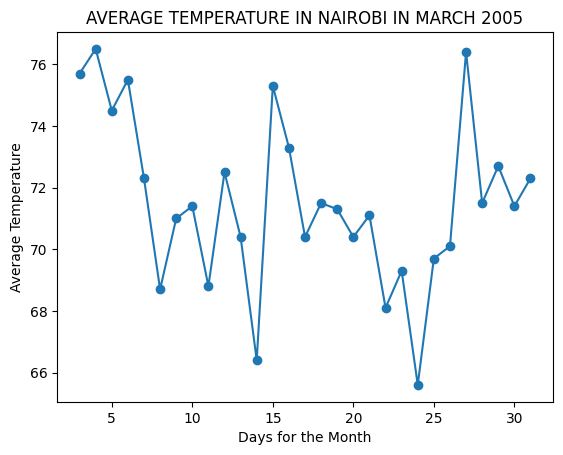

In [87]:
plt.plot(new_days,new_temperature,'o-')
plt.xlabel('Days for the Month')
plt.ylabel('Average Temperature')
plt.title('AVERAGE TEMPERATURE IN NAIROBI IN MARCH 2005')
plt.show

### Highest and Lowest Temperature

In [88]:
highest_temp = np.max(new_temperature)
lowest_temp = np.min(new_temperature)

print("Highest temperature:", highest_temp)
print("Lowest temperature:", lowest_temp)

Highest temperature: 76.5
Lowest temperature: 65.6


# The Curve-Fit Function

In [89]:
def bestFit(t,a,b,c):
    return a*np.cos(t)*(2*(np.pi)*t + b)+c

In [90]:
popt, pcov = curve_fit(bestFit, new_days, new_temperature)

In [91]:
popt


array([ 1.43740166e-03, -5.28116117e+02,  7.15057364e+01])

In [92]:
pcov

array([[ 1.88116359e-04,  5.53099347e+01, -4.85923619e-04],
       [ 5.53099347e+01,  1.65248181e+07, -1.35887016e+02],
       [-4.85923619e-04, -1.35887016e+02,  2.78799624e-01]])

Text(0.5, 1.0, 'LINE OF BEST FIT')

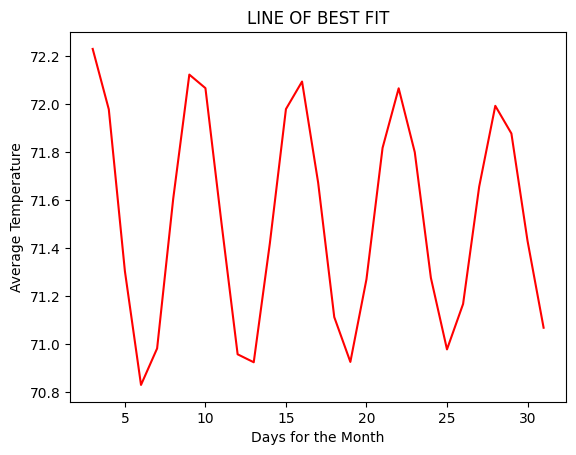

In [93]:
plt.plot(new_days, bestFit(new_days, *popt), 'r-')
plt.xlabel('Days for the Month')
plt.ylabel('Average Temperature')
plt.title('LINE OF BEST FIT')

## Error Analysis

In [94]:
e = np.repeat(0.5,len(new_days))

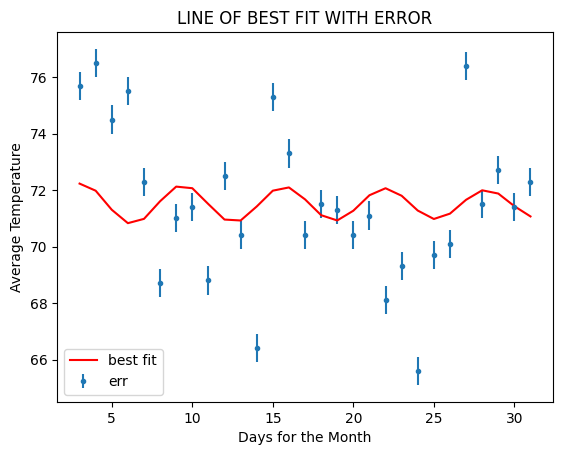

In [95]:
plt.errorbar(new_days,new_temperature,yerr=e, fmt='.',label='err')
plt.plot(new_days, bestFit(new_days,*popt),'r-',alpha=1, label='best fit')
plt.xlabel('Days for the Month')
plt.ylabel('Average Temperature')
plt.title('LINE OF BEST FIT WITH ERROR')
plt.legend()
